# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\PRANAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

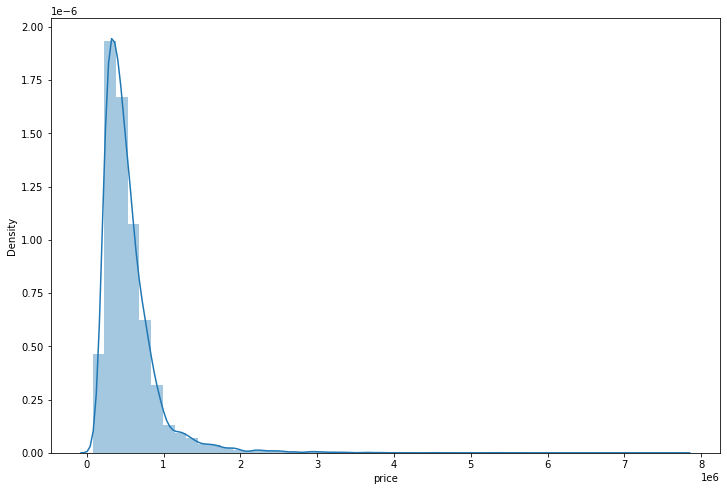

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\PRANAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

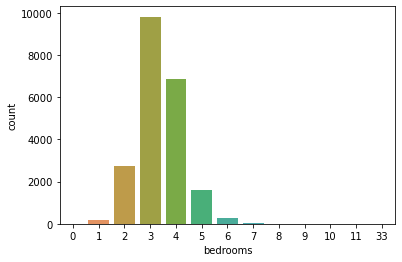

In [6]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

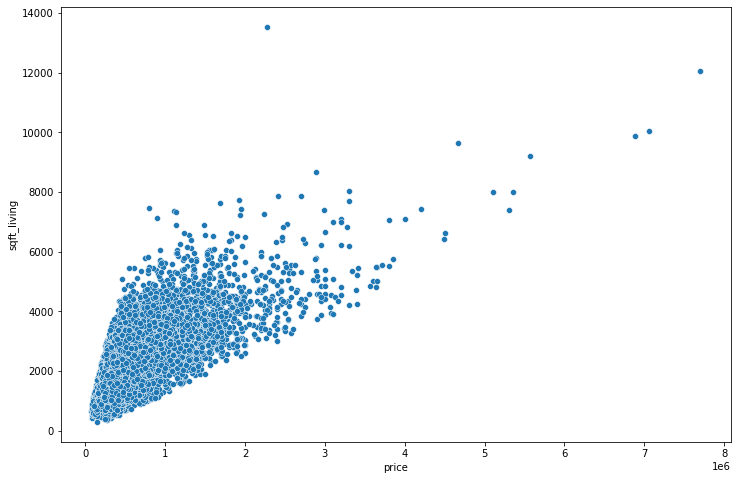

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

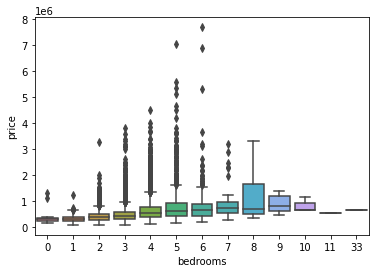

In [8]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

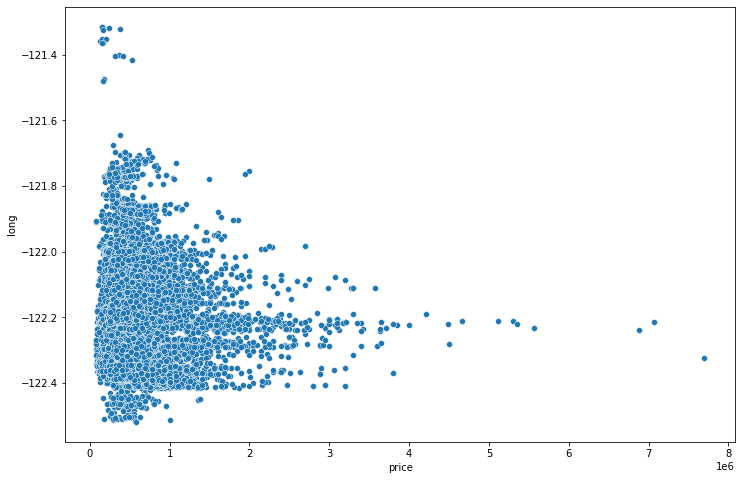

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

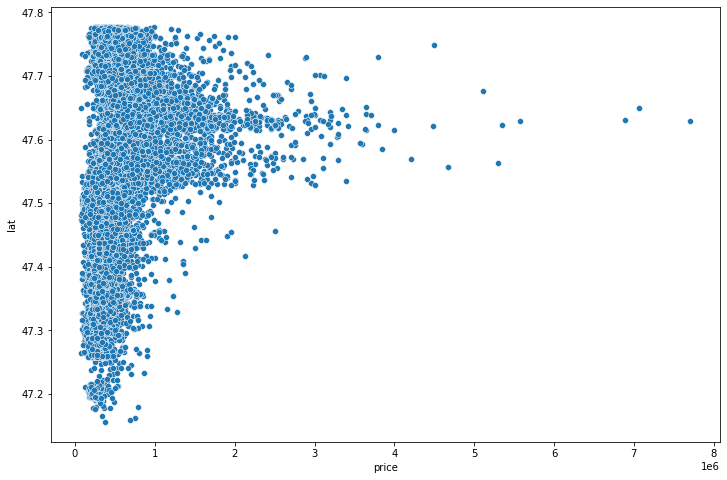

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

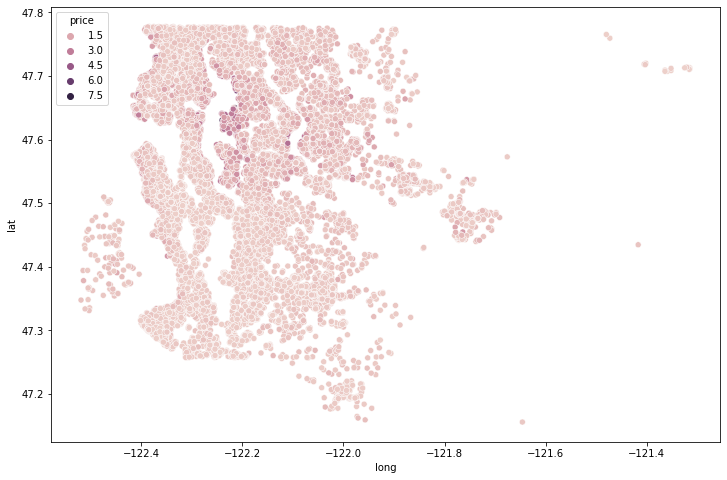

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [12]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [13]:
len(df)*(0.01)

216.13

In [14]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

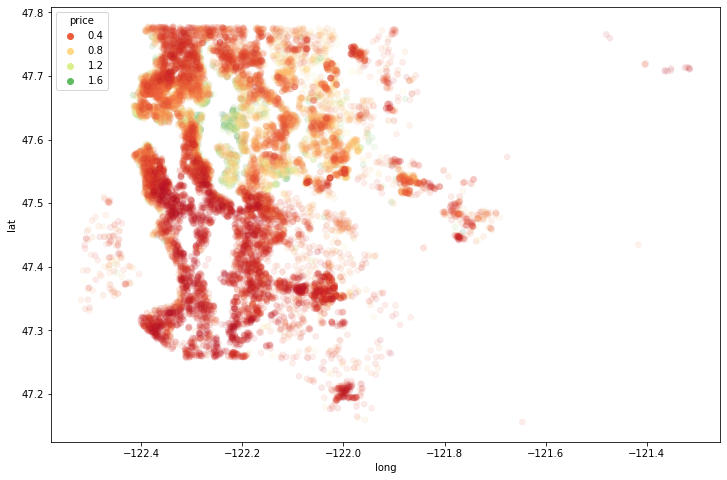

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.1)

### Other Features

<AxesSubplot:xlabel='waterfront', ylabel='price'>

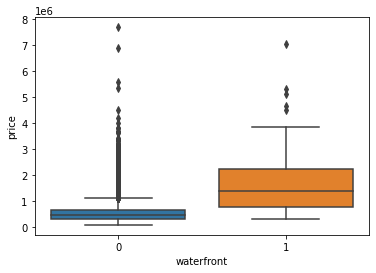

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
df = df.drop('id',axis=1)

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['month'] = df['date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

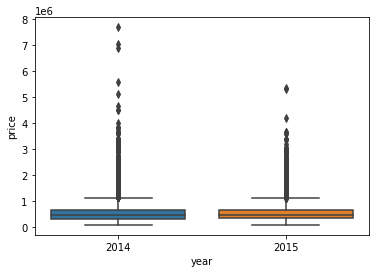

In [24]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

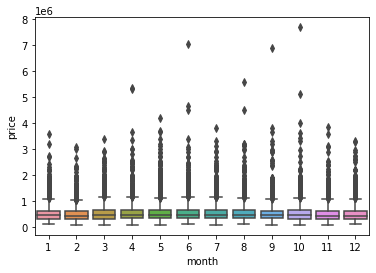

In [25]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

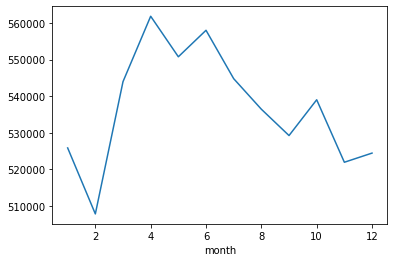

In [26]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

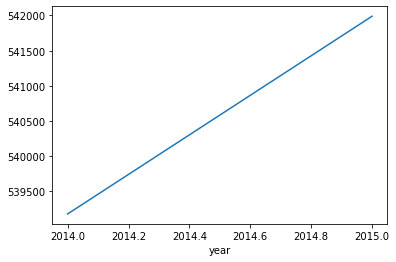

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df = df.drop('date',axis=1)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [30]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [33]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15129, 19)

In [43]:
X_test.shape

(6484, 19)

## Creating a Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [46]:
%%time
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 12ms/step - loss: 410973797307.7333 - val_loss: 433018896384.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429609870131.2000 - val_loss: 429433978880.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 410946681241.6000 - val_loss: 394580197376.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 363527529130.6667 - val_loss: 271469641728.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 226191056759.4667 - val_loss: 128027525120.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 110305990724.2667 - val_loss: 104132009984.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 95999884834.1333 - val_loss: 102321307648.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 99112809335.4667 - val_loss: 100727422976.0000
Epoch 9/400
119/1

119/119 [==============================] - 0s 3ms/step - loss: 37886555409.0667 - val_loss: 38828634112.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 37171614958.9333 - val_loss: 38666334208.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 43953818487.4667 - val_loss: 38460260352.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37825845043.2000 - val_loss: 38213677056.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 38613207159.4667 - val_loss: 38033031168.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 38957307392.0000 - val_loss: 37855604736.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37223931921.0667 - val_loss: 37779537920.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 35359842474.6667 - val_loss: 37476630528.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33653714022.4000 - val_loss: 32823986176.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33121303261.8667 - val_loss: 32840382464.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 31310896093.8667 - val_loss: 32856156160.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32432843741.8667 - val_loss: 32747614208.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 35740777745.0667 - val_loss: 32679882752.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 34256838894.9333 - val_loss: 32750518272.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32974060987.7333 - val_loss: 32628264960.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 31708723712.0000 - val_loss: 32596135936.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 30374386380.8000 - val_loss: 31054094336.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31055433130.6667 - val_loss: 31139135488.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31480465561.6000 - val_loss: 31044560896.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 30346761096.5333 - val_loss: 31014324224.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31989009937.0667 - val_loss: 30978785280.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 33292288170.6667 - val_loss: 30964482048.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31883803477.3333 - val_loss: 31013025792.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 32194022690.1333 - val_loss: 30911176704.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 992us/step - loss: 31678760004.2667 - val_loss: 30057711616.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 29616451840.0000 - val_loss: 30026461184.0000
Epoch 269/400
119/119 [==============================] - 0s 1000us/step - loss: 31962168456.5333 - val_loss: 29955528704.0000
Epoch 270/400
119/119 [==============================] - 0s 998us/step - loss: 30717108838.4000 - val_loss: 29939744768.0000
Epoch 271/400
119/119 [==============================] - 0s 981us/step - loss: 27651760452.2667 - val_loss: 29977159680.0000
Epoch 272/400
119/119 [==============================] - 0s 985us/step - loss: 30393175705.6000 - val_loss: 29913739264.0000
Epoch 273/400
119/119 [==============================] - 0s 981us/step - loss: 30895282944.0000 - val_loss: 29951346688.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 31216425181.8667 - val_loss: 29896583168.0000
Epoch 275/400
119

119/119 [==============================] - 0s 1ms/step - loss: 29142669653.3333 - val_loss: 29150091264.0000
Epoch 334/400
119/119 [==============================] - 0s 994us/step - loss: 30056556288.0000 - val_loss: 29109088256.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29370315076.2667 - val_loss: 29087672320.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 28786181376.0000 - val_loss: 29095671808.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 28990918596.2667 - val_loss: 29142763520.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 28642010692.2667 - val_loss: 29054609408.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29064245145.6000 - val_loss: 29078816768.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29209920204.8000 - val_loss: 29059348480.0000
Epoch 341/400
119/119 [=====

119/119 [==============================] - 0s 1ms/step - loss: 27889259366.4000 - val_loss: 28374173696.0000
Epoch 400/400
119/119 [==============================] - 0s 973us/step - loss: 29440000426.6667 - val_loss: 28315277312.0000
Wall time: 1min 5s


In [47]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

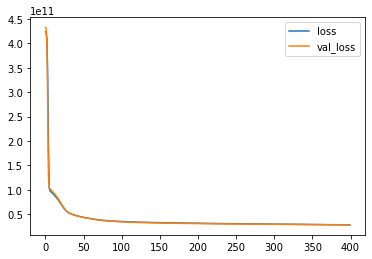

In [48]:
losses.plot()

# Predicting on brand new house

In [51]:
single_house=df.drop('price',axis=1).iloc[0]

In [53]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [54]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.81818182, 0.        ]])

In [55]:
model.predict(single_house)

array([[287110.1]], dtype=float32)

In [56]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [57]:
%%time
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 425614473352.5333 - val_loss: 433057595392.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 421534661290.6667 - val_loss: 431850455040.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 424664251596.8000 - val_loss: 419840458752.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 391663652317.8666 - val_loss: 368296558592.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 335514947310.9333 - val_loss: 253234462720.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 211981467238.4000 - val_loss: 136564850688.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 116582806869.3333 - val_loss: 105068552192.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 104990244590.9333 - val_loss: 102795403264.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 1ms/step - loss: 38851395106.1333 - val_loss: 41430712320.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 42997228202.6667 - val_loss: 41241485312.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 41512722500.2667 - val_loss: 41026072576.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 39952236526.9333 - val_loss: 40796278784.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 38111803067.7333 - val_loss: 40685961216.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37312866116.2667 - val_loss: 40453357568.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37846052642.1333 - val_loss: 40245383168.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 42892716714.6667 - val_loss: 40091578368.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33953250542.9333 - val_loss: 34227697664.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33021685828.2667 - val_loss: 34195400704.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 36557960704.0000 - val_loss: 34142904320.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 36912888729.6000 - val_loss: 34154225664.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 33811112704.0000 - val_loss: 34036037632.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 34039636701.8667 - val_loss: 33997359104.0000
Epoch 141/400
119/119 [==============================] - 0s 1000us/step - loss: 34641912832.0000 - val_loss: 33939877888.0000
Epoch 142/400
119/119 [==============================] - 0s 993us/step - loss: 38202462600.5333 - val_loss: 33941420032.0000
Epoch 143/4

119/119 [==============================] - 0s 1ms/step - loss: 35340524151.4667 - val_loss: 32001087488.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 33146806135.4667 - val_loss: 31993466880.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 32402684484.2667 - val_loss: 32017844224.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 33853926451.2000 - val_loss: 31929546752.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 33524056832.0000 - val_loss: 31930585088.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 32121797512.5333 - val_loss: 31879706624.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31129410816.0000 - val_loss: 32005437440.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 31105569092.2667 - val_loss: 31868510208.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29961132117.3333 - val_loss: 30859913216.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30316913971.2000 - val_loss: 30892077056.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 31417360588.8000 - val_loss: 30829979648.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 33065659716.2667 - val_loss: 30820052992.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 34767736524.8000 - val_loss: 30798428160.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 31626972876.8000 - val_loss: 30854600704.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 31433280290.1333 - val_loss: 30889564160.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 32522159667.2000 - val_loss: 30756341760.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 33200036590.9333 - val_loss: 29995689984.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30817920887.4667 - val_loss: 29974630400.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30620776533.3333 - val_loss: 30038462464.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 28262628710.4000 - val_loss: 29959837696.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 31708245998.9333 - val_loss: 30021937152.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 30849861085.8667 - val_loss: 29938139136.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 31387967095.4667 - val_loss: 29949347840.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 32025761672.5333 - val_loss: 29915652096.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 31078792994.1333 - val_loss: 29365817344.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29272150033.0667 - val_loss: 29343862784.0000
Wall time: 51.2 s


In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

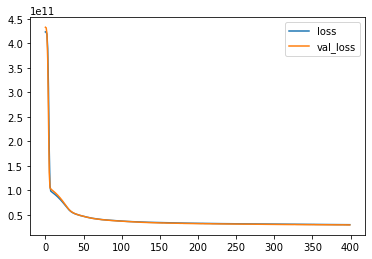

In [59]:
losses.plot()